In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, firwin, lfilter

In [23]:
# 1. Cargar archivo .txt desde tu Drive (ajusta ruta)
file_path = "FUERZA 3.1.txt"

# 2. Leer el archivo, saltando encabezado
with open(file_path, "r") as f:
    lines = f.readlines()
    header_lines = [i for i, line in enumerate(lines) if line.startswith("#")]
    data_start = header_lines[-1] + 1

data = pd.read_csv(file_path, sep="\t", skiprows=data_start, header=None)
data.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "unused"]

# 3. Extraer la señal RAW del canal A1
raw_emg = data["A1"].values

# 4. Filtro pasa banda
def bandpass_filter(signal, lowcut=20.0, highcut=450.0, fs=1000.0, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered = bandpass_filter(raw_emg)

# 5. Rectificación
#rectified = np.abs(filtered)

# 6. Suavizado (envelope)
#def moving_average(signal, window_size=100):
    #return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

#smoothed = moving_average(rectified)

In [24]:
fs = 1000           # frecuencia de muestreo
nyq = fs/2          # frecuencia de Nyquist

# 1) FIR ideal paso-bajo con firwin (Hamming)
N = 100             # orden (número de coeficientes = N+1)
cutoff = 40        # Hz

#w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
h_firwin = firwin(numtaps=N, cutoff=cutoff,pass_zero='lowpass', window='hamming', fs=fs) #cutoff/nyq
b_firwin = firwin(numtaps=N, cutoff=cutoff,pass_zero='lowpass', window='blackman', fs=fs) #cutoff/nyq

In [25]:
# filtrar con FIR (lfilter)
y_h = lfilter(h_firwin, 1, filtered)
y_b = lfilter(b_firwin, 1, filtered)

t = np.arange(len(raw_emg)) / fs  # eje de tiempo en segundos

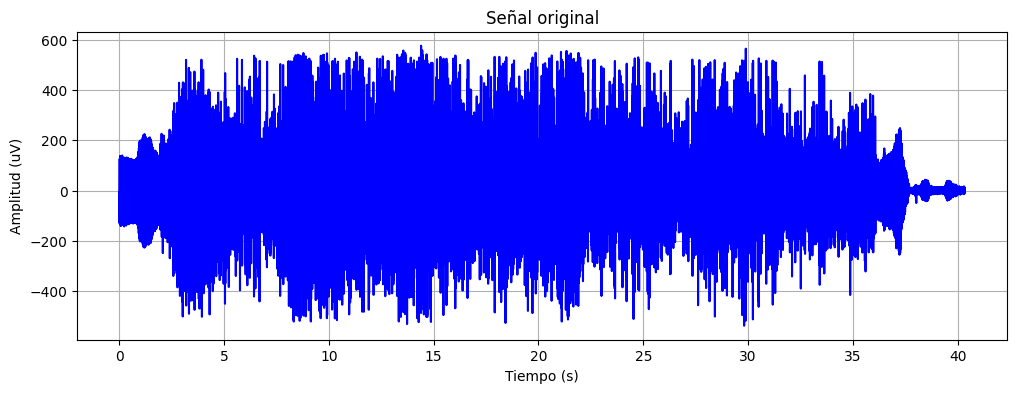

In [26]:
# 7. Gráfica final
plt.figure(figsize=(12, 4))
plt.plot(t, filtered, label='EMG original)', color='blue')
plt.title("Señal original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)
plt.show()

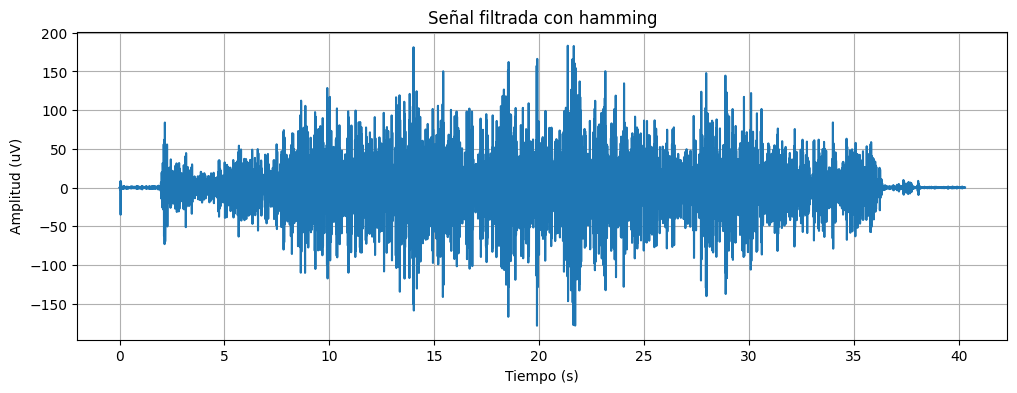

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(t[:-50], y_h[:-50], label='Señal filtrada')
plt.title('Señal filtrada con hamming')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)
plt.show()

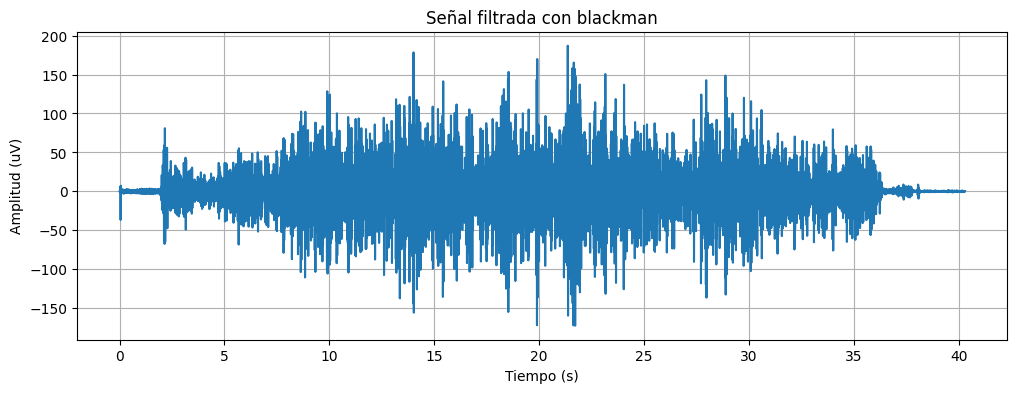

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(t[:-50], y_b[:-50], label='Señal filtrada')
plt.title('Señal filtrada con blackman')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)
plt.show()

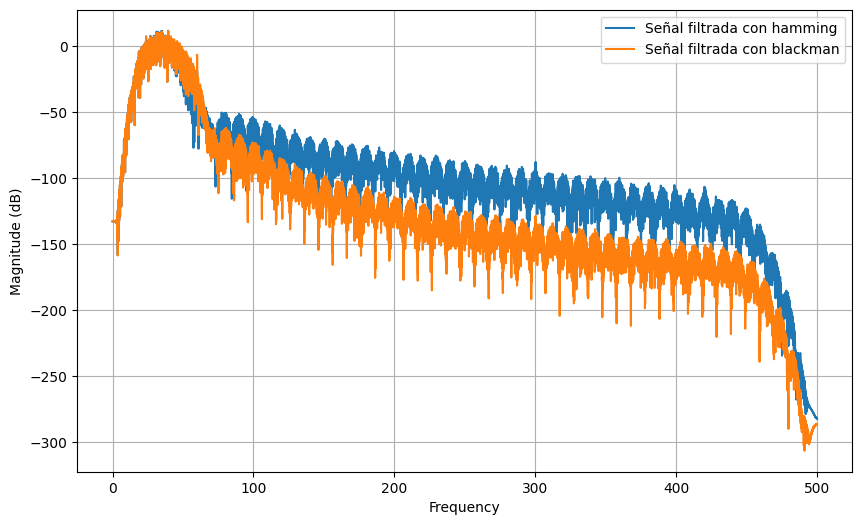

In [29]:
plt.figure(figsize=(10, 6))
plt.magnitude_spectrum(y_h, scale='dB',Fs=fs, label='Señal filtrada con hamming')
plt.magnitude_spectrum(y_b, scale='dB',Fs=fs, label='Señal filtrada con blackman')
plt.grid()
plt.legend()